In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("NFL.NS.csv")
df = df.dropna()
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,53.450001,56.799999,52.500000,55.349998,46.208496,156211.0
1,2012-01-04,55.599998,64.400002,54.799999,62.849998,52.469810,706876.0
2,2012-01-05,63.000000,66.500000,62.849998,65.800003,54.932598,616330.0
3,2012-01-06,65.400002,69.199997,64.800003,67.599998,56.435307,599300.0
5,2012-01-09,82.500000,87.050003,79.599998,82.800003,69.124908,1955697.0


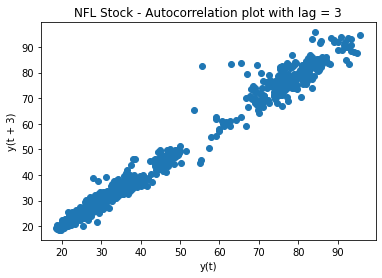

In [3]:
plt.figure()
lag_plot(df['Open'], lag=3)
plt.title('NFL Stock - Autocorrelation plot with lag = 3')
plt.show()

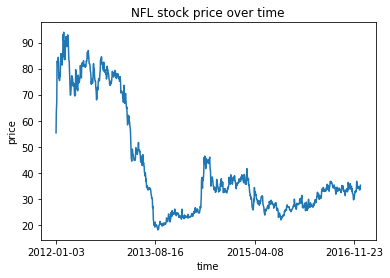

In [4]:
plt.plot(df["Date"], df["Close"])
plt.xticks(np.arange(0,1227, 400), df['Date'].loc[0:1227:400])
plt.title("NFL stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [5]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 0.5798587214323886


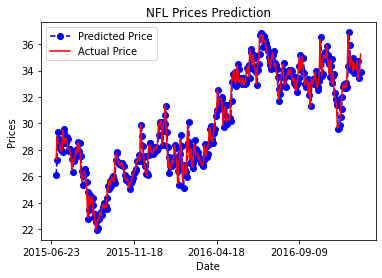

In [6]:
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('NFL Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(858,1227,100), df.Date.loc[858:1227:100])
plt.legend()
plt.show()